## Implementing ML Model Monitoring Pipelines

### Model Performance Drift:
**Description**: Setup a monitoring pipeline to track key performance metrics (e.g., accuracy, precision) of an ML model over time using a monitoring tool or dashboard.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Simulated historical and current data
historical_data = pd.DataFrame({
    "feature1": [1, 2, 3, 4, 5],
    "feature2": [5, 4, 3, 2, 1],
    "target": [0, 0, 1, 1, 1]
})

current_data = pd.DataFrame({
    "feature1": [1, 2, 1, 4, 5],
    "feature2": [5, 4, 2, 1, 1],
    "target": [0, 0, 0, 1, 1]
})

X_train, y_train = historical_data[["feature1", "feature2"]], historical_data["target"]
X_test, y_test = current_data[["feature1", "feature2"]], current_data["target"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

joblib.dump(model, "model.joblib")
joblib.dump(scaler, "scaler.joblib")

performance_metrics = {"accuracy": accuracy, "precision": precision}
performance_metrics


{'accuracy': 0.8, 'precision': 0.6666666666666666}

### Feature Distribution Drift:
**Description**: Monitor the distribution of your input features in deployed models to detect any significant shifts from training data distributions.

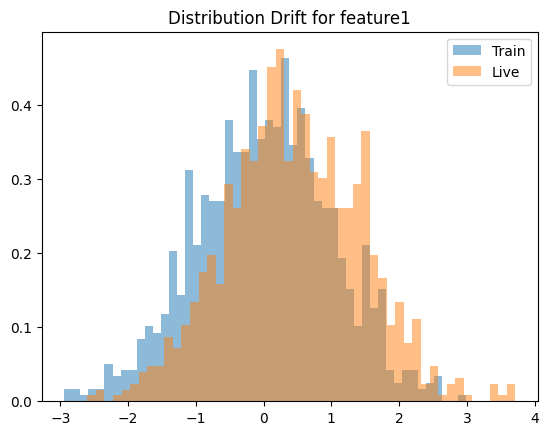

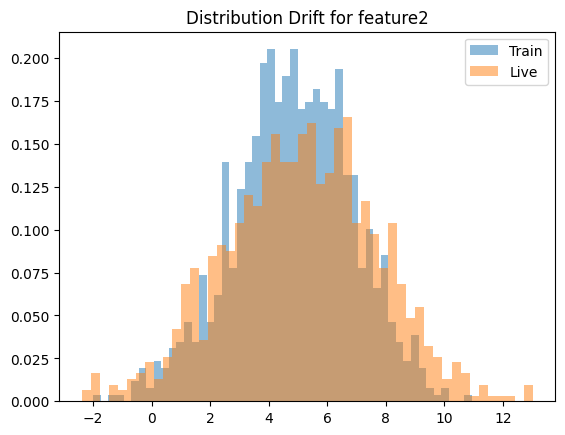

{'feature1': {'ks_statistic': 0.168, 'p_value': 9.803857095159588e-13},
 'feature2': {'ks_statistic': 0.11, 'p_value': 1.0915917613597424e-05}}

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

train_data = pd.DataFrame({
    "feature1": np.random.normal(0, 1, 1000),
    "feature2": np.random.normal(5, 2, 1000)
})

live_data = pd.DataFrame({
    "feature1": np.random.normal(0.5, 1, 1000),
    "feature2": np.random.normal(5, 2.5, 1000)
})

drift_results = {}
for col in train_data.columns:
    stat, p_value = ks_2samp(train_data[col], live_data[col])
    drift_results[col] = {"ks_statistic": stat, "p_value": p_value}

for col in train_data.columns:
    plt.hist(train_data[col], bins=50, alpha=0.5, label="Train", density=True)
    plt.hist(live_data[col], bins=50, alpha=0.5, label="Live", density=True)
    plt.title(f"Distribution Drift for {col}")
    plt.legend()
    plt.show()

drift_results


### Anomaly Detection in Predictions:
**DEscription**: Implement an anomaly detection mechanism to flag unusual model
predictions. Simulate anomalies by altering input data.

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

anomalies = predictions.copy()
anomalies[::50] += np.random.normal(100, 20, size=(len(anomalies[::50])))

df = pd.DataFrame(X, columns=[f"feature{i}" for i in range(1, 6)])
df["prediction"] = anomalies

iso = IsolationForest(contamination=0.05)
df["anomaly"] = iso.fit_predict(df[["prediction"]])
df["anomaly"] = df["anomaly"].map({1: 0, -1: 1})

df["anomaly"].value_counts()


0    950
1     50
Name: anomaly, dtype: int64